---
## KNN and SVM <br> <font size=3.4>Dataset:wc-at.csv<br>KNN, SVM, Grid search CV used
---

In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/Ketan/Data science/Assignments/KNN/wc-at.csv')
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [3]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [18]:
#Converting the Target variable i.e. AT into Categorical
df['Category'] = pd.cut(df['AT'], 
                        bins=[0,95, np.inf], 
                        labels=['Low/Mid','High'],
                        include_lowest=True)
df

,Waist,AT,Category
0,74.75,25.72,Low/Mid
1,72.60,25.89,Low/Mid
2,81.80,42.60,Low/Mid
3,83.95,42.80,Low/Mid
4,74.65,29.84,Low/Mid
...,...,...,...
104,100.10,124.00,High
105,93.30,62.20,Low/Mid
106,101.80,133.00,High
107,107.90,208.00,High


In [7]:
array = df.values
X = array[:,0:2]
Y = array[:,2]

## KNN Classification

**Let's search for the best K-value using Grid Search CV algorithm**

## Grid Search for Algorithm Tuning

In [8]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.9813852813852814
{'n_neighbors': 6}


## Visualizing the CV results

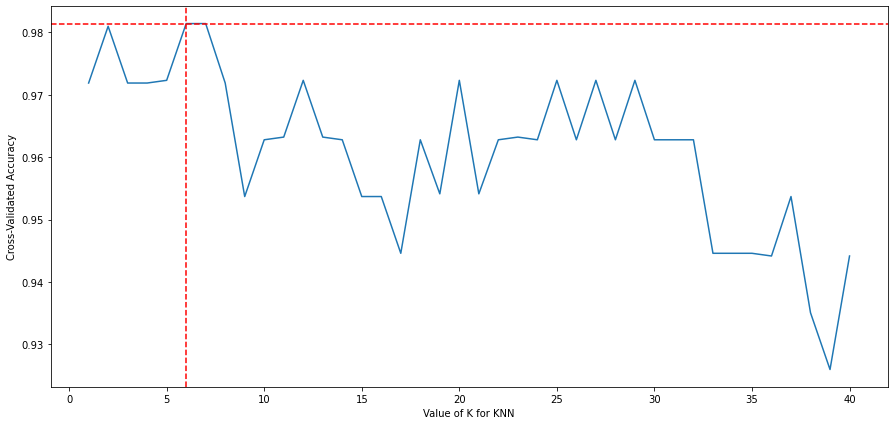

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.9813852813852814, color='r', linestyle='--')
plt.axvline(x=6, color='r', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### So we can finalise that k=6 is the best value

In [10]:
#Applying KNN 
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=6)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.9818181818181818


## SVM Classification

**Let's search for the best params using Grid Search CV**

In [11]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000] },
             {'kernel':['linear'],'C':[1,10,100,1000] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 1, 'kernel': 'linear'}, 1.0)

In [17]:
#Using SVM with the best params
num_folds = 10
kfold = KFold(n_splits=10)
model = SVC(C=1, kernel='linear', random_state=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100)


100.0
